# Desvanecimento Rayleigh

O modelo de canal com desvanecimento Rayleigh é utilizado para detecção não coerente, para sinais em RF transmitidos por canais com desvanecimento, em que o sinal recebido  pode ser representado por um processo da forma:

$$
r(t) = R\cos(2\pi f_c t + \theta (t)) \tag{1}
$$

com 

$$
\theta(t) \approx \mathrm{uniforme}(0, 2\pi) \tag{2}
$$

a função densidade de probabilidade do desvanecimento é:

$$
p_{R_m}(r_m) = 
\begin{cases} 
\frac{r_m}{\sigma^2} e^{-\frac{r_m^2}{2\sigma^2}}, & r_m > 0,\; m = 2, \ldots, M \\
0, & \text{caso contrário}
\end{cases} \tag{3}
$$

Escrevendo o processo R(t) como uma soma de N vetores de amplitude $R_i$, com variância $\sigma^2$ e fase com distribuição uniforme entre 0 e $2\pi$, como:

$$
Rcos(2\pi f_c t + \Theta (t)) = R\cos(2\pi f_c t)\cos(\theta) - Rsen(2\pi f_c t)\mathrm{sen}(\theta)\tag{4}
$$

e definindo $X_i = R_i\cos(\theta)$ e $Y_i = R_i \mathrm{sen}(\theta)$, calculamos:

 $E[X_i] = 0$,  $E[Y_i] = 0$, e  $cov(X_i, Y_i) = 0$. 
 
 Além disso, $\sigma _{x_i}^2 = \sigma _{y_i}^2 = E[R_i^2]$

Média de X: -0.0012
Média de Y: 0.0009
Variância de X: 4.0019
Variância de Y: 4.0025
Covariância entre X e Y: 0.0029


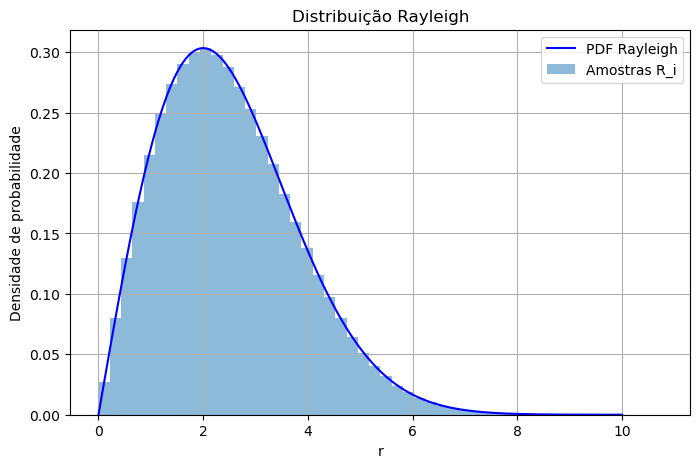

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 2000000         # número de amostras
sigma = 2.0         # parâmetro da FDP Rayleigh

# Geração de amostras de desvanecimento Rayleigh e  fase Uniforme
R = np.random.rayleigh(scale=sigma, size=N)
Theta = np.random.uniform(low=0, high=2*np.pi, size=N)

# Componentes X_i e Y_i
X_i = R * np.cos(Theta)
Y_i = R * np.sin(Theta)

# Soma dos componentes
X = np.sum(X_i)
Y = np.sum(Y_i)

# ---------------------------------------
# Valor esperado, variância e covariância
#----------------------------------------

media_X = np.mean(X_i)
media_Y = np.mean(Y_i)

cov_XY = np.cov(X_i, Y_i)
var_X = cov_XY[0, 0]
var_Y = cov_XY[1, 1]
cov_XY = cov_XY[0, 1]




print(f"Média de X: {media_X:.4f}")
print(f"Média de Y: {media_Y:.4f}")
print(f"Variância de X: {var_X:.4f}")
print(f"Variância de Y: {var_Y:.4f}")
print(f"Covariância entre X e Y: {cov_XY:.4f}")

#-----------------------------------------------
# Densidade de probabilidade Rayleigh
#-----------------------------------------------
r_vals = np.linspace(0, 5*sigma, 500)
pdf_rayleigh = (r_vals / sigma**2) * np.exp(-r_vals**2 / (2*sigma**2))

plt.figure(figsize=(8,5))
plt.plot(r_vals, pdf_rayleigh, label="PDF Rayleigh", color='blue')
plt.hist(R, bins=50, density=True, alpha=0.5, label="Amostras R_i")
plt.xlabel("r")
plt.ylabel("Densidade de probabilidade")
plt.title("Distribuição Rayleigh")
plt.legend()
plt.grid(True)
plt.show()

Quando N é grande o suficiente, e não há parcelas dominantes, $X$ e $Y$ convergem para gaussianas, com FDP:

$$
f_{X,Y}(x, y) = \frac{1}{2\pi \sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

em que a variável de interesse é $R = \sqrt{X^2 + Y^2}$

Assim, podemos calcular a função de probabilidade acumulada:

$$
F_R(r) = Pr[R^2<r] = Pr[X^2 + Y^2 < r^2] = 1-e^{-\frac{r^2}{2\sigma^2}}
$$

e então, a função densidade de probabilidade:

$$
f_r(r) = \frac{r}{\sigma^2}e^{-\frac{r^2}{2\sigma^2}}
$$

A partir de uma sequÊncia de amostras: $r_1, r_2, ..., r_N $, pode-se estimar o parâmetro variância $\sigma^2$:

$$
\sigma^2 = \frac{1}{2N} \sum_{i = 1}^N r_i^2
$$

In [ ]:
import numpy as np

# Medições r_i, i=1,2,...,N
N = 10000
sigma_real = 2.0
r = np.random.rayleigh(scale=sigma_real, size=N)

# Estimativa de sigma^2
sigma2_est = np.mean(r**2) / 2
print(f"Estimativa de σ²: {sigma2_est:.4f}")

Estimativa de σ²: 4.0611
